# Cab Rides Dataset Analysis

In [2]:
# importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Link to dataset: https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices

### Importing the dataset

In [3]:
data = pd.read_csv("cab_rides.csv")
data.head(5)

distance cab_type     time_stamp    destination            source  price  \
0      0.44     Lyft  1544952607890  North Station  Haymarket Square    5.0   
1      0.44     Lyft  1543284023677  North Station  Haymarket Square   11.0   
2      0.44     Lyft  1543366822198  North Station  Haymarket Square    7.0   
3      0.44     Lyft  1543553582749  North Station  Haymarket Square   26.0   
4      0.44     Lyft  1543463360223  North Station  Haymarket Square    9.0   

   surge_multiplier                                    id    product_id  \
0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line   
1               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier   
2               1.0  981a3613-77af-4620-a42a-0c0866077d1e          lyft   
3               1.0  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   lyft_luxsuv   
4               1.0  e0126e1f-8ca9-4f2e-82b3-50505a09db9a     lyft_plus   

           name  
0        Shared  
1           Lux  
2          Lyft  
3  Lux Black XL  
4       Lyft XL

### Data Discovery

In [4]:
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [5]:
# Dimensions of the dataset
data.shape 

(693071, 10)

In [6]:
# Some statistical information about our dataset
data.describe()

distance    time_stamp          price  surge_multiplier
count  693071.000000  6.930710e+05  637976.000000     693071.000000
mean        2.189430  1.544046e+12      16.545125          1.013870
std         1.138937  6.891925e+08       9.324359          0.091641
min         0.020000  1.543204e+12       2.500000          1.000000
25%         1.280000  1.543444e+12       9.000000          1.000000
50%         2.160000  1.543737e+12      13.500000          1.000000
75%         2.920000  1.544828e+12      22.500000          1.000000
max         7.860000  1.545161e+12      97.500000          3.000000

In [7]:
# checking missing values
data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [ ]:
# visualizing the above
sns.heatmap(data.isnull(), yticklabels=False, cmap='Viridis')

'price' column has about 55k missing values. We need to handle that.

In [8]:
# The count of rows for each type of cab
data.groupby('cab_type').count()

distance  time_stamp  destination  source   price  surge_multiplier  \
cab_type                                                                        
Lyft        307408      307408       307408  307408  307408            307408   
Uber        385663      385663       385663  385663  330568            385663   

              id  product_id    name  
cab_type                              
Lyft      307408      307408  307408  
Uber      385663      385663  385663

In [33]:
# Checking datatype of the columns
data.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

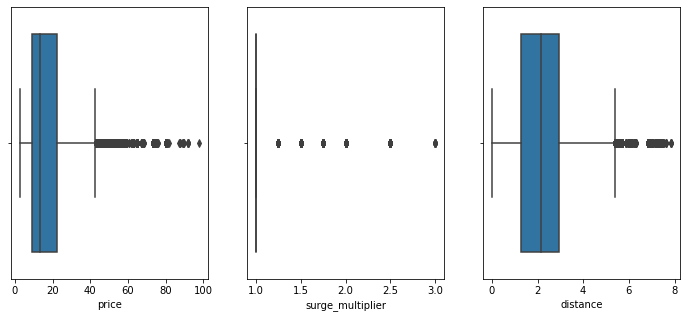

In [36]:
# Checking outliers
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(x=data['price'])
plt.subplot(1,3,2)
sns.boxplot(x=data['surge_multiplier'])
plt.subplot(1,3,3)
sns.boxplot(x=data['distance'])
plt.show()

In [82]:
# Checking correlation
# sns.heatmap(data.corr(), annot=True)

<Figure size 720x720 with 0 Axes>

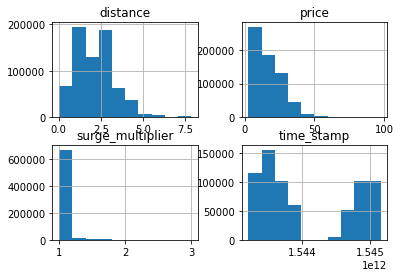

In [39]:
# Checking whether the data follows normal distribution
plt.figure(figsize=(10,10))
data.hist()
plt.show()

In [44]:
# Checking the type of values of each column
for i in data.columns:
    print("___",i,"___")
    print(data[i].value_counts())
    print("\n")

___ distance ___
2.66    9174
2.32    9127
2.84    8562
1.41    7884
1.25    7434
        ... 
4.85       6
5.06       6
4.87       6
6.13       6
5.95       6
Name: distance, Length: 549, dtype: int64


___ cab_type ___
Uber    385663
Lyft    307408
Name: cab_type, dtype: int64


___ time_stamp ___
1543270450151    56
1543406347990    51
1543248670078    42
1543226890179    42
1543270270438    42
                 ..
1543719176284     1
1543282942057     1
1543693680576     1
1544689807113     1
1543212858920     1
Name: time_stamp, Length: 114335, dtype: int64


___ destination ___
Financial District         58851
Theatre District           57798
Back Bay                   57780
Boston University          57764
Haymarket Square           57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destinat

We can see 'id' is unique for each row

In [45]:
data.count()

distance            693071
cab_type            693071
time_stamp          693071
destination         693071
source              693071
price               637976
surge_multiplier    693071
id                  693071
product_id          693071
name                693071
dtype: int64

In [ ]:
# merge weather data if needed

### Data Preparation

In [73]:
# Removing unnecessary columns
# remove 'id'
data.drop('id', axis=1, inplace=True)

In [74]:
data.head(2)

distance cab_type     time_stamp    destination            source  price  \
0      0.44     Lyft  1544952607890  North Station  Haymarket Square    5.0   
1      0.44     Lyft  1543284023677  North Station  Haymarket Square   11.0   

   surge_multiplier    product_id    name  
0               1.0     lyft_line  Shared  
1               1.0  lyft_premier     Lux

In [80]:
# inspecting the missing values
# price - row check, 
datanull = data[data['price'].isnull()]

In [81]:
for i in data.columns:
    print("___",i,"___")
    print(datanull[i].value_counts())
    print("\n")

___ distance ___
2.66    1164
2.32    1129
1.41    1038
2.84    1002
1.16     937
        ... 
3.67       1
0.66       1
4.70       1
4.96       1
4.79       1
Name: distance, Length: 422, dtype: int64


___ cab_type ___
Uber    55095
Name: cab_type, dtype: int64


___ time_stamp ___
1543270450151    6
1543433168034    6
1543450269473    5
1544808311969    4
1543401127963    4
                ..
1543414988163    1
1543851183322    1
1543295541951    1
1545083706783    1
1544879713972    1
Name: time_stamp, Length: 48705, dtype: int64


___ destination ___
Financial District         4659
Theatre District           4609
Boston University          4593
Haymarket Square           4593
North End                  4592
Fenway                     4591
Back Bay                   4590
Northeastern University    4590
South Station              4590
West End                   4583
Beacon Hill                4563
North Station              4542
Name: destination, dtype: int64


___ source ___
Finan

In [91]:
data[(data['price'].notnull()) & (data['name']=="Taxi")]

Empty DataFrame
Columns: [distance, cab_type, time_stamp, destination, source, price, surge_multiplier, product_id, name]
Index: []

We observe that the rows having NaN values in 'price' column were of 'Uber Taxis'. But upon further inspection, we see that for the cabs that we have got the prices, they are not of type 'Taxi'. Therefore, we infer that the passengers who booked the ride for 'Uber Taxi' could not avail the ride, so price value is NaN.

In [113]:
data[~(data['price']>0)]

distance cab_type     time_stamp       destination            source  \
18          1.11     Uber  1543673584211          West End         North End   
31          2.48     Uber  1543794776318     South Station       Beacon Hill   
40          2.94     Uber  1543523885298            Fenway     North Station   
60          1.16     Uber  1544731816318          West End         North End   
69          2.67     Uber  1543583283653       Beacon Hill         North End   
...          ...      ...            ...               ...               ...   
693025      2.50     Uber  1544886913192       Beacon Hill     South Station   
693047      0.91     Uber  1543456028123       Beacon Hill  Haymarket Square   
693049      1.79     Uber  1543456028123       Beacon Hill         North End   
693060      1.61     Uber  1543728484149  Haymarket Square  Theatre District   
693068      1.00     Uber  1543708385534         North End          West End   

        price  surge_multiplier                            product_id  name  
18        0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi  
31        0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi  
40        0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi  
60        0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi  
69        0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi  
...       ...               ...                                   ...   ...  
693025    0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi  
693047    0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi  
693049    0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi  
693060    0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi  
693068    0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi  

[55095 rows x 9 columns]

In [111]:
# Fill in the missing values
# we fill the price field having NaN with 0
data['price'].replace(to_replace = np.nan, value = 0.0, inplace=True)

In [112]:
data.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
product_id          0
name                0
dtype: int64

In [124]:
# introducing a column called Booked having values 1 for Yes and 0 for No
book = []
for i in data['price']:
    if i>0:
        book.append(1)
    else:
        book.append(0)
bookSeries = pd.Series(np.array(book))

data['booked'] = bookSeries
data

distance cab_type     time_stamp    destination            source  \
0           0.44     Lyft  1544952607890  North Station  Haymarket Square   
1           0.44     Lyft  1543284023677  North Station  Haymarket Square   
2           0.44     Lyft  1543366822198  North Station  Haymarket Square   
3           0.44     Lyft  1543553582749  North Station  Haymarket Square   
4           0.44     Lyft  1543463360223  North Station  Haymarket Square   
...          ...      ...            ...            ...               ...   
693066      1.00     Uber  1543708385534      North End          West End   
693067      1.00     Uber  1543708385534      North End          West End   
693068      1.00     Uber  1543708385534      North End          West End   
693069      1.00     Uber  1543708385534      North End          West End   
693070      1.00     Uber  1543708385534      North End          West End   

        price  surge_multiplier                            product_id  \
0         5.0               1.0                             lyft_line   
1        11.0               1.0                          lyft_premier   
2         7.0               1.0                                  lyft   
3        26.0               1.0                           lyft_luxsuv   
4         9.0               1.0                             lyft_plus   
...       ...               ...                                   ...   
693066   13.0               1.0  6f72dfc5-27f1-42e8-84db-ccc7a75f6969   
693067    9.5               1.0  55c66225-fbe7-4fd5-9072-eab1ece5e23e   
693068    0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a   
693069   27.0               1.0  6d318bcc-22a3-4af6-bddd-b409bfce1546   
693070   10.0               1.0  997acbb5-e102-41e1-b155-9df7de0a73f2   

                name  booked  
0             Shared       1  
1                Lux       1  
2               Lyft       1  
3       Lux Black XL       1  
4            Lyft XL       1  
...              ...     ...  
693066        UberXL       1  
693067         UberX       1  
693068          Taxi       0  
693069     Black SUV       1  
693070      UberPool       1  

[693071 rows x 10 columns]

In [126]:
# Renaming the columns
# name -> ride_option
data.rename(columns = {'name': 'ride_option'}, inplace = True)

In [127]:
data

distance cab_type     time_stamp    destination            source  \
0           0.44     Lyft  1544952607890  North Station  Haymarket Square   
1           0.44     Lyft  1543284023677  North Station  Haymarket Square   
2           0.44     Lyft  1543366822198  North Station  Haymarket Square   
3           0.44     Lyft  1543553582749  North Station  Haymarket Square   
4           0.44     Lyft  1543463360223  North Station  Haymarket Square   
...          ...      ...            ...            ...               ...   
693066      1.00     Uber  1543708385534      North End          West End   
693067      1.00     Uber  1543708385534      North End          West End   
693068      1.00     Uber  1543708385534      North End          West End   
693069      1.00     Uber  1543708385534      North End          West End   
693070      1.00     Uber  1543708385534      North End          West End   

        price  surge_multiplier                            product_id  \
0         5.0               1.0                             lyft_line   
1        11.0               1.0                          lyft_premier   
2         7.0               1.0                                  lyft   
3        26.0               1.0                           lyft_luxsuv   
4         9.0               1.0                             lyft_plus   
...       ...               ...                                   ...   
693066   13.0               1.0  6f72dfc5-27f1-42e8-84db-ccc7a75f6969   
693067    9.5               1.0  55c66225-fbe7-4fd5-9072-eab1ece5e23e   
693068    0.0               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a   
693069   27.0               1.0  6d318bcc-22a3-4af6-bddd-b409bfce1546   
693070   10.0               1.0  997acbb5-e102-41e1-b155-9df7de0a73f2   

         ride_option  booked  
0             Shared       1  
1                Lux       1  
2               Lyft       1  
3       Lux Black XL       1  
4            Lyft XL       1  
...              ...     ...  
693066        UberXL       1  
693067         UberX       1  
693068          Taxi       0  
693069     Black SUV       1  
693070      UberPool       1  

[693071 rows x 10 columns]

### Data Cleaning

In [128]:
# Check which categorical values need to be encoded
data.columns[data.dtypes=='object']

Index(['cab_type', 'destination', 'source', 'product_id', 'ride_option'], dtype='object')

### Data Transformation

In [47]:
# Convert the 'time_stamp' column to datetime format
time = pd.to_datetime(data['time_stamp']/1000, unit='s')

In [71]:
time

0        2018-12-16 09:30:07.890000105
1        2018-11-27 02:00:23.677000046
2        2018-11-28 01:00:22.197999954
3        2018-11-30 04:53:02.749000072
4        2018-11-29 03:49:20.223000050
                      ...             
693066   2018-12-01 23:53:05.533999919
693067   2018-12-01 23:53:05.533999919
693068   2018-12-01 23:53:05.533999919
693069   2018-12-01 23:53:05.533999919
693070   2018-12-01 23:53:05.533999919
Name: time_stamp, Length: 693071, dtype: datetime64[ns]

In [68]:
print("Year : ",time.dt.year.nunique())
print("Month : ",time.dt.month.nunique())
print("Time : ",time.dt.time.nunique())
print("Day of week : ",time.dt.dayofweek.nunique())
print("Hour of the day (24 hr): ",time.dt.hour.nunique())

Year :  1
Month :  2
Time :  113868
Day of week :  7
Hour of the day (24 hr):  24


In [70]:
# Transform the 'time_stamp' column and break it down to month, weekday, hour
time.dt.dayofweek

0         6
1         1
2         2
3         4
4         3
         ..
693066    5
693067    5
693068    5
693069    5
693070    5
Name: time_stamp, Length: 693071, dtype: int64

In [129]:
# fill 'month', 'day', 'hour' into the dataset
data['Month'] = time.dt.month
data['Day'] = time.dt.dayofweek
data['Hour'] = time.dt.hour
data.head()

distance cab_type     time_stamp    destination            source  price  \
0      0.44     Lyft  1544952607890  North Station  Haymarket Square    5.0   
1      0.44     Lyft  1543284023677  North Station  Haymarket Square   11.0   
2      0.44     Lyft  1543366822198  North Station  Haymarket Square    7.0   
3      0.44     Lyft  1543553582749  North Station  Haymarket Square   26.0   
4      0.44     Lyft  1543463360223  North Station  Haymarket Square    9.0   

   surge_multiplier    product_id   ride_option  booked  Month  Day  Hour  
0               1.0     lyft_line        Shared       1     12    6     9  
1               1.0  lyft_premier           Lux       1     11    1     2  
2               1.0          lyft          Lyft       1     11    2     1  
3               1.0   lyft_luxsuv  Lux Black XL       1     11    4     4  
4               1.0     lyft_plus       Lyft XL       1     11    3     3

In [130]:
# Remove 'time_stamp'
data.drop('time_stamp',axis=1,inplace=True)

At this point, it will be better to make a copy of the dataset.

In [131]:
df = data.copy(deep=True)

In [132]:
df

distance cab_type    destination            source  price  \
0           0.44     Lyft  North Station  Haymarket Square    5.0   
1           0.44     Lyft  North Station  Haymarket Square   11.0   
2           0.44     Lyft  North Station  Haymarket Square    7.0   
3           0.44     Lyft  North Station  Haymarket Square   26.0   
4           0.44     Lyft  North Station  Haymarket Square    9.0   
...          ...      ...            ...               ...    ...   
693066      1.00     Uber      North End          West End   13.0   
693067      1.00     Uber      North End          West End    9.5   
693068      1.00     Uber      North End          West End    0.0   
693069      1.00     Uber      North End          West End   27.0   
693070      1.00     Uber      North End          West End   10.0   

        surge_multiplier                            product_id   ride_option  \
0                    1.0                             lyft_line        Shared   
1                    1.0                          lyft_premier           Lux   
2                    1.0                                  lyft          Lyft   
3                    1.0                           lyft_luxsuv  Lux Black XL   
4                    1.0                             lyft_plus       Lyft XL   
...                  ...                                   ...           ...   
693066               1.0  6f72dfc5-27f1-42e8-84db-ccc7a75f6969        UberXL   
693067               1.0  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX   
693068               1.0  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi   
693069               1.0  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV   
693070               1.0  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool   

        booked  Month  Day  Hour  
0            1     12    6     9  
1            1     11    1     2  
2            1     11    2     1  
3            1     11    4     4  
4            1     11    3     3  
...        ...    ...  ...   ...  
693066       1     12    5    23  
693067       1     12    5    23  
693068       0     12    5    23  
693069       1     12    5    23  
693070       1     12    5    23  

[693071 rows x 12 columns]

For our "modelling" we'll use 'df' and 
for our "analysis" we'll use 'data'

In [ ]:
# be careful before encoding

In [20]:
# Label encode the strings
from sklearn.preprocessing import LabelEncoder
uber_le = df.copy()
lyft_le = df.copy()

lb = LabelEncoder()

uber_le['name'] = lb.fit_transform(uber_data['name'])
uber_le['source'] = lb.fit_transform(uber_data['source'])
uber_le['destination'] = lb.fit_transform(uber_data['destination'])

lyft_le['name'] = lb.fit_transform(lyft_le['name'])
lyft_le['source'] = lb.fit_transform(lyft_le['source'])
lyft_le['destination'] = lb.fit_transform(lyft_le['destination'])

In [21]:
# One hot encode them


### Data Analysis

In [22]:
# Plotting trips by hours in a day


In [23]:
# Plotting trips during every day of the month


In [24]:
# How many trips were completed or canceled


In [25]:
# Where most of the dropoffs ocurred


In [26]:
# What product type is usually chosen


In [27]:
# What is the average fare, distance, amount and time spent on rides


In [28]:
# Which weekdays have the highest average fares per km ridden


In [29]:
# Which was the longest/shortest and more expensive/cheaper ride


### Modelling and training

In [30]:
### splitting dataset, then cross validation for better model.

In [133]:
# dividing the dataset based on predictor and target variables
X = df.drop('surge_multiplier',axis=1)
y = df['surge_multiplier']

In [ ]:
# splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
################# put the model objects in one array and using for loop apply and measure the accuracy. Say why you chose those models

In [ ]:
# Regression - Linear, MultiLinear, Regularization, Ensemble methods(decision tree) using algorithms for regressors 
# Why not SVM